<a href="https://colab.research.google.com/github/Gaurav7004/ml-on-gcp/blob/master/kmeans_OutlierDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # Set a seed value
# seed_value= 123

# # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
# import os
# os.environ['PYTHONHASHSEED']=str(seed_value)

# # 2. Set `python` built-in pseudo-random generator at a fixed value
# import random
# random.seed(seed_value)

# # 3. Set `numpy` pseudo-random generator at a fixed value
# import numpy as np
# np.random.seed(seed_value)

In [2]:
import numpy as np
import pandas as pd

In [3]:
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# load the dataset
df = read_csv('NFHS_Outliers.csv')
df.shape

(342, 7)

In [5]:
# retrieve the array
data = df.values

X, y = df[['v21', 'v15', 'v30', 'v31', 'v32']], df[['v15', 'v30', 'v31', 'v32']]
X.shape

(342, 5)

In [6]:
# X = X.values
# y = y.values



In [23]:
#k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
k = [7]
score = []

for n_cluster in k:
  kmeans = KMeans(n_clusters=n_cluster).fit(X)
  silhouette_avg = silhouette_score(X, kmeans.labels_)
  score.append(silhouette_score(X, kmeans.labels_))
  print('silhouette_score for %i Clusters = %0.4f' % (n_cluster, silhouette_avg))

dictionary = dict(zip(k, score))


k1 = [key for (key, value) in dictionary.items() if value == max(dictionary.values())]

k = k1[0]
k
# k = np.max(score)


silhouette_score for 7 Clusters = 0.3481


7

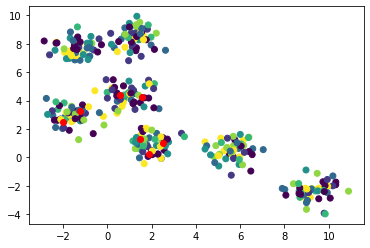

In [24]:

for centers in k1:
  X, y = make_blobs(n_samples=342, centers=centers, cluster_std=0.60, random_state=0)
  plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))
  plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='red')




In [9]:
kmeans = KMeans().fit(X)
print(len(X))
Total_Values = len(X)
# y_kmeans = kmeans.predict(X)
# print(y_kmeans)

342


In [10]:
#empty dictionaries
from sklearn.base import BaseEstimator
clusters_centroids=dict()
clusters_radii= dict()

# finding cluster radii ans cluster centroids
for cluster in list(set(y)):
    clusters_centroids[cluster]=list(zip(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1]))[cluster]
    clusters_radii[cluster] = max([np.linalg.norm(np.subtract(i,clusters_centroids[cluster])) for i in zip(X[y == cluster, 0],X[y == cluster, 1])])
    

In [11]:
list(set(y))

[0, 1]

In [12]:
clusters_radii

{0: 2.0760561805563458, 1: 2.3121240739631235}

In [13]:
clusters_centroids

{0: (1.4562600849559346, 4.619240421668909),
 1: (1.3616647157629043, 0.7929937766916924)}

In [14]:
kmeans.cluster_centers_

array([[ 1.45626008,  4.61924042],
       [ 1.36166472,  0.79299378],
       [ 1.53280319,  3.62637175],
       [ 2.1203354 ,  1.45886487],
       [ 1.98034179, -0.02251794],
       [ 0.59138084,  3.94563047],
       [ 2.64921365,  0.89240417],
       [ 0.39284209,  4.94508219]])

In [15]:
# number of points in respective clusters
my_dict = {kmeans.cluster_centers_[i, 0]: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
my_dict

{0.3928420850406207: array([  6,  14,  24,  30,  33,  36,  46,  53,  86,  95, 103, 121, 122,
        128, 134, 137, 146, 147, 152, 154, 163, 166, 180, 211, 223, 233,
        238, 240, 258, 268, 272, 278, 282, 289, 290, 297, 316, 322, 328,
        335, 339, 340]),
 0.5913808396004339: array([  3,  11,  15,  25,  28,  35,  58,  59,  60,  71,  72,  76,  83,
         88, 114, 120, 125, 130, 131, 138, 144, 145, 156, 160, 161, 167,
        173, 175, 181, 182, 186, 190, 194, 199, 205, 219, 226, 230, 234,
        245, 252, 266, 270, 275, 280, 295, 298, 301, 303, 312, 313, 314,
        318, 320, 323, 326, 329]),
 1.3616647157629043: array([  7,  12,  13,  18,  19,  21,  47,  51,  61,  64,  65,  66,  78,
         81,  97, 102, 105, 108, 111, 113, 116, 119, 123, 127, 132, 135,
        142, 149, 159, 164, 170, 174, 184, 191, 192, 198, 220, 231, 249,
        250, 251, 260, 261, 262, 271, 294, 296, 317, 319, 331, 341]),
 1.4562600849559346: array([  0,   1,   4,   8,  10,  16,  20,  26,  34,  42,  4

In [16]:
# distance from centroid
X_dist = kmeans.transform(X)

df = pd.DataFrame(X_dist.sum(axis=1).round(2), columns=['sqdist'])
df['label'] = kmeans.labels_

df.head(5)


,sqdist,label
0,17.18,0
1,17.11,0
2,16.83,2
3,18.25,5
4,20.53,0


In [17]:
l = list(df['label'].unique())
l.sort()
print(l)

list_2 = []

for i in l: 
  sum_of_elements = df[df['label']== i]['sqdist'].sum()
  no_items = len(df[df['label']== i])
  boundary_mean = sum_of_elements/no_items
  #print(i, boundary_mean)

  df_boundary = df[df['label']== i]['sqdist']
  
  list_1 = [ i for i in df_boundary if i > boundary_mean ]
  n = len(list_1)
  list_2.append(n)

n_outliers = sum(list_2)

contamination = n_outliers / Total_Values
print(contamination)

[0, 1, 2, 3, 4, 5, 6, 7]
0.39473684210526316


In [18]:
print(n_outliers)

135
